#                                  Projet Insuffisance Cardiaque

## Introduction

Les maladies cardiavasculaires sont la première cause de mort dans le monde. On estime à hauteur de 17.9 millions de mort chaque année représentant 31% des morts mondiales. On note avec un taux 4/5 de ces morts sont dues à une attaque puis un arrêt cardiaque, et 1/3 de ces morts se passent prématuremment en dessous l'âge de 70 ans. Les insuffisances cardiaques sont fréquemment causées par des maladies cardiovasculaires.

<u>Objectif de l'étude:</u> Nous allons étudié un dataset de 918 patients où nous allons essayé de prédire si un patient est malade ou nous grâce à la data-analyse et à des algorythmes de Machine Learning.  

Le dataset étudié provient du site kaggle. Il répertorie 11 caractéristiques de 918 patients afin de prédire une maladie cardiaque probable.

Les données des patients de ce dataset proviennent de différents pays.

Cleveland: 303 patients   
Hongrie: 294 patients Long  
Beach VA (Californie): 200 patients   
Stalog (Heart) Data Set: 270 patients  

Total: 1190 patients  
Lignes dupliquées: 272 patients  

Dataset final: 918 patients

In [1]:
#Importation des packages et fichiers utiles à l'étude
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
import statsmodels.api 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, ElasticNetCV, LinearRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [2]:
#Importation du dataset de l'étude
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Ce dataset contient 918 lignes et répertorie 12 colonnes. 11 caractérisatiques et 1 variable cible qui permet de savoir s'il y a présence d'une maladie cardiaque chez un patient. 

**Description des caractéristiques**

- Age: âge du patient  
- Sex: sexe du patient  
- ChestPainType: type de douleur thoracique (TA: Angine typique, ATA: Angyne atypique, NAP: Douleur Non-anginal, ASY: Asymptomatique) 
- RestingBP: tension arterielle au repos [mmHg]  
- Cholesterol: serum cholesterol [mg/dl]  
- FastingBS: taux de glycémie [1: si FastingBS > 120 mg/dl, 0: sinon]  
- RestingECG: résultat de l'electrocardiogramme au repos [Normal: Normal, ST: onde ST-T pathologie (inversion(s) de l'onde T et/ou élévation ST ou depréssion de > 0.05 mV), LVH: montre la présence probable ou confirmée d'une hypertrophie ventriculaire par le critère de Estes]  
- MaxHR: fréquence cardiaque maximale [valeur numérique comprise entre 60 et 202]  
- ExcerciseAngina: Présence d'une angine de poitrine induite [Y: yes, N: No]  
- Oldpeak:oldpeak = ST [Valeur numérique mesurée en dépression]  
- ST_Slope = pente du segment ST [Up: Upsloping (ascendant), Flat: Flat (plat), Down: downslopping (desendant)]
- HeartDisease: classe de sortie, variable cible [1: maladie cardiaque, 0: Normal]  



In [3]:
#Description du dataset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
#Informations sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
#Calcul des valeurs manquentes du dataset
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

On constate 2 types de valeurs présent dans nos valeurs caractéristiques: 7 colonnes à valeurs numériques et 4 à valeurs catégorielles. Le tableau ne présente par ailleurs aucune valeur manquante.

## Exploration du dataset

### Impact de l'age et du sexe

Nous allons maintenant explorer le dataset à travers les différentes données que l'on possède. Dans un premier temps, on s'interesse à l'importance de l'âge et du sexe.  
Pour les données catégorielles, on choisira une représentation en histogramme (ou diagramme en barre) pour faciliter la comparaison entre les populations qui possèdent ou non un certain critère en fonction du fait qu'elles soient malades ou non.

M    725
F    193
Name: Sex, dtype: int64

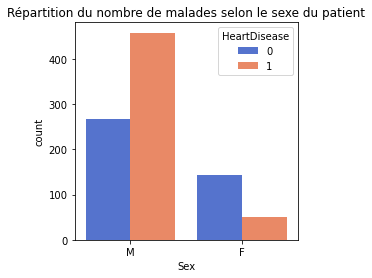

In [6]:
#Création de la palette de couleurs pour le projet 
pa = ['royalblue','coral']

#Histogramme du nombre de femmes et d'hommes dans l'étude
plt.figure(figsize = (4,4))
sns.countplot(x='Sex', hue='HeartDisease', palette = pa, data=df);
plt.title('Répartition du nombre de malades selon le sexe du patient');
df.Sex.value_counts()

Il y a dans notre étude 725 hommes et 193 femmes représentant une proportion de 79% d'hommes pour 21% de femmes environ. L'étude est déséquilibrée sur le plan de la représentation du genre des patients. De plus, les femmes développent beaucoup moins de maladies cardiaques que les hommes. Il sera interessant de prendre en compte ce facteur par la suite. L'âge est aussi un facteur important et il est essentiel de savoir la répartition par tranche d'âge.

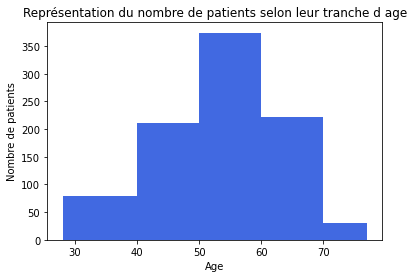

In [7]:
#Création de tranches d'âge avec un intervalle de 10 ans
bins = [28,40,50,60,70,77];

#Histogramme de la répartition des patients selon les traches d'âge
plt.hist(df.Age, bins = bins, color = 'royalblue');
plt.xlabel('Age');
plt.ylabel('Nombre de patients');
plt.title('Représentation du nombre de patients selon leur tranche d age');

In [8]:
#Création d'une colonne à partir de quantiles qui va servir à répartir les patients en 4 catégories égales
df['Cat_Age'] = pd.qcut(df.Age, q = [0,0.25,0.5,0.75,1])

In [9]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cat_Age
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,"(27.999, 47.0]"
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,"(47.0, 54.0]"
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,"(27.999, 47.0]"
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,"(47.0, 54.0]"
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,"(47.0, 54.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,"(27.999, 47.0]"
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,"(60.0, 77.0]"
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,"(54.0, 60.0]"
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,"(54.0, 60.0]"


In [10]:
df.Cat_Age.value_counts()

(27.999, 47.0]    239
(47.0, 54.0]      232
(54.0, 60.0]      226
(60.0, 77.0]      221
Name: Cat_Age, dtype: int64

On observe une certaine répartition des patients selon leur age avec une population majoritaire entre 50 et 60 ans. L'âge sera donc un critère majeur de l'étude. On choisira alors de créer une nouvelle colonne 'Cat_Age' qui catégorise les patients en 4 classes différentes selon leur age. Un nombre de quantiles égale à 4 permet alors de séparer les patients dans des classes équiréparties. 

Maintenant que l'on possède les quantiles liés à l'âge, on va créer une nouvelle colonne "Class_Age" qui va permettre de classer les personnes selon leur age.

In [11]:
#Création d'une nouvelle colonne Class_Age
df.loc[df.Age>27.999,'Class_Age']='1'
df.loc[df.Age>47,'Class_Age']='2'
df.loc[df.Age>54,'Class_Age']='3'
df.loc[df.Age>60,'Class_Age']='4'

#Suppression de la colonne cat_Age
df = df.drop('Cat_Age', 1)

In [12]:
df = df[['Age','Class_Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']]

In [13]:
df

,Age,Class_Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,2,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,2,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,2,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,4,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,3,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,3,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


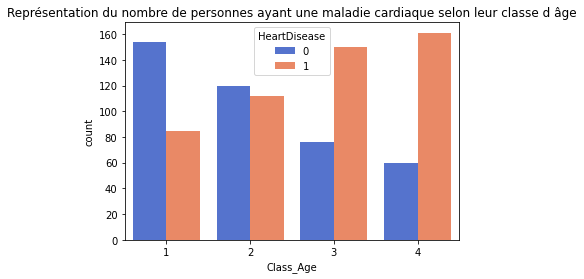

In [14]:
#Histogramme des personnes malades ou non selon leur tranche d'âge
sns.countplot(x='Class_Age', hue='HeartDisease', palette=pa, data=df);
plt.title('Représentation du nombre de personnes ayant une maladie cardiaque selon leur classe d âge');

On constate 2 groupes de population dans notre étude. Les personnes de moins de 54 ans font moins de maladies cardiaques même si pour la classe 2 cela reste très proche. On peut donc affirmer que l'âge possède un impact important sur la présence d'une maladie cardiaque mais que même pour une classe jeune le nombre est quand même à prendre en considération.

### Etude des données médicales

On dispose d'un panel de données médicales pour chaque patient. Le but de l'étude n'est pas de comprendre d'un point de vue scientifique les termes du dataset mais d'interpréter de façon indépendante leur importance sur la probable présence d'une maladie cardiaque.

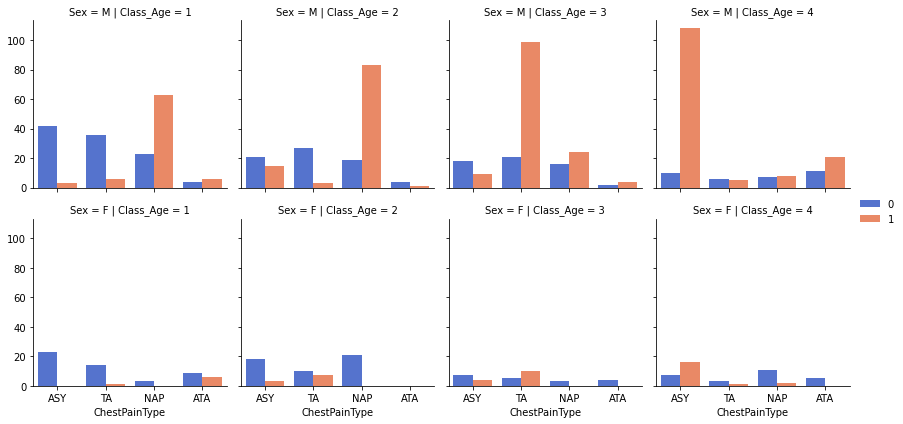

In [15]:
#Histogramme de la répartition du type de douleur thoracique par classe d'âge et par sexe
g = sns.FacetGrid(df, col="Class_Age", row="Sex");
g.map_dataframe(sns.countplot, "ChestPainType", hue="HeartDisease", palette=pa);
g.add_legend();

Pour les hommes, on constate un nombre important de malades selon une tranche d'âge en fonction d'une présence d'un certain type de douleur thoracique. Pour les personnes entre 54 et 60 ans, la présence d'une angine typique induit fortement la présence d'une maladie cardiaque. Au dela de 60 ans, les malades n'ont pas majoritairement pas de douleur thoracique et pourtant sont pathogènes.  
Chez les femmes jeunes, c'est la présence d'une angyne atypique qui caractérise la présence d'une maladie au coeur. Pour les catégories suivantes, c'est le critère d'une angyne typique qui est déterminant. Au dela de 60 ans, point commun avec les hommes, le cas asymptomatique est synonyme de maladie.  

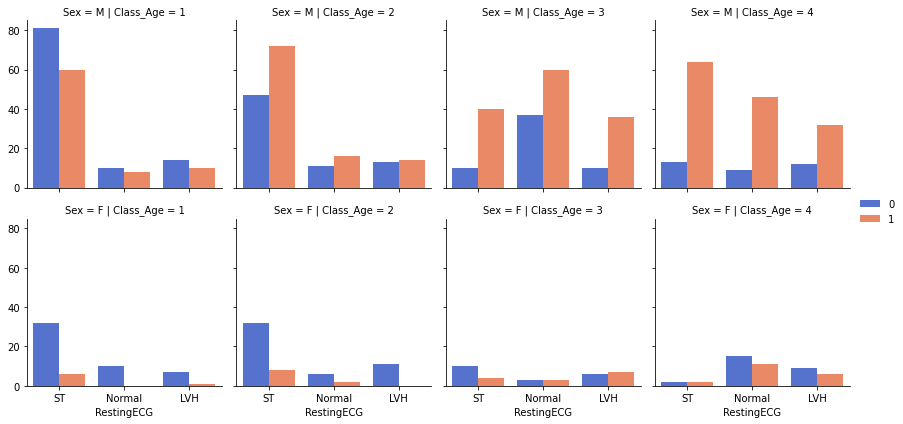

In [16]:
#Histogramme de la répartition des résultats de l'electrocardiagramme des patients au repos par classe d'âge et par sexe
g = sns.FacetGrid(df, col="Class_Age", row="Sex");
g.map_dataframe(sns.countplot, "RestingECG", hue="HeartDisease", palette=pa);
g.add_legend();

Pour les hommes en-dessous de 54 ans, une anomalie au niveau de l'onde ST est caractériqtique d'une maladie cardiaque majoritairement. Au delà de 54 ans, il y a beaucoup de gens malades peu importe les résultas sur l'électrocardiogramme.   
Pour les femmes, on retrouve la même caractéristique en-dessous de 54 ans même si le nombre de personnes saines reste majoritaire. De même, au-delà de 54 ans, le nombre de malades est plus présent peu importe le critère. 

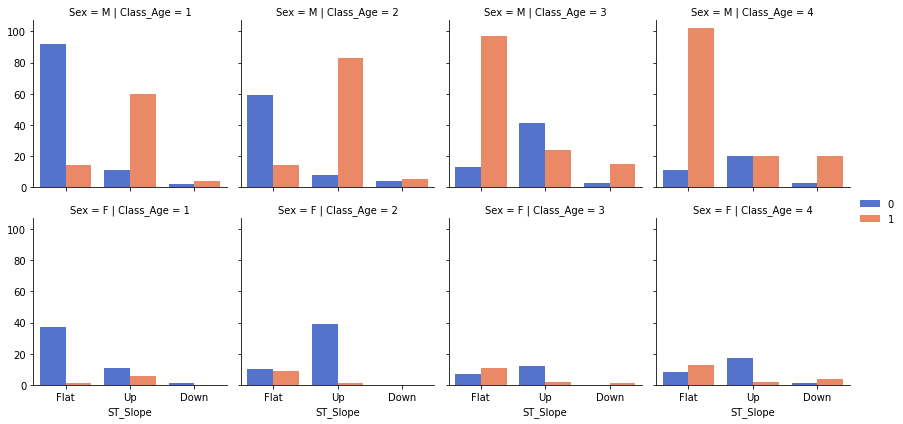

In [17]:
#Histogramme du type de pente du Segment ST par Classe d'âge et par Sex
g = sns.FacetGrid(df, col="Class_Age", row="Sex");
g.map_dataframe(sns.countplot, "ST_Slope", hue="HeartDisease", palette=pa);
g.add_legend();

Pour les hommes au-dessus de 54 ans, on constate que le segment ST plat induit une maladie cardiaque alors que pour les autres catégories c'est un segment ST sus-décalé qui induit une maladie.  
Pour les femmes jeunes de la catégorie 1 c'est aussi le sus-décalage qui montre la présence d'une maladie même si la majorité n'est pas pathogène. Dans les autres catégories d'âge,c'est un segment plat montre la présence d'une maladie. 
On en conclue que même si le segment ST est plat, il peut y avoir une présence de maladie cardiaque surement à cause d'un autre facteur pathogène.

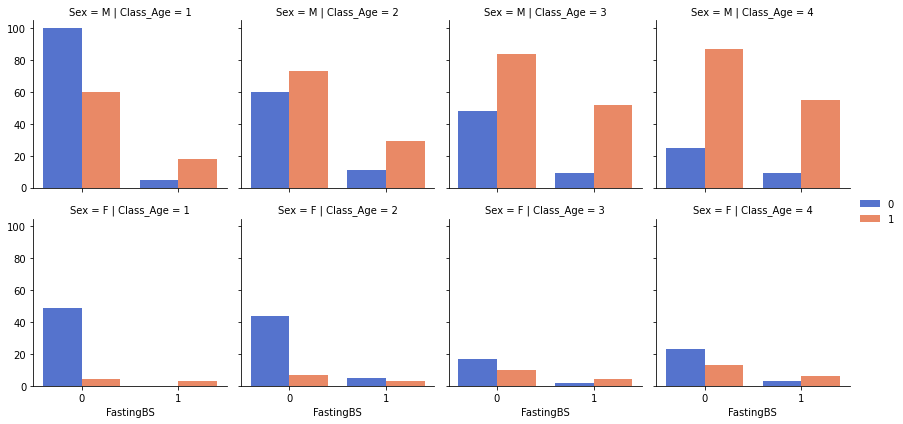

In [18]:
#Histogramme du taux de glycemie entre 2 catégaries (120 mg/dl ou non) par classe d'âge et par sexe
g = sns.FacetGrid(df, col="Class_Age", row="Sex");
g.map_dataframe(sns.countplot, "FastingBS", hue="HeartDisease", palette=pa);
g.add_legend();

Pour les hommes, un taux élevé en glycémie induit fortement une maladie cardiaque peu importe la catégorie d'âge. On remarque cependant un nombre important de malades même avec un taux inférieur à 120 mg/dl. Seul la classe 1 démontre qu'un taux faible en glycémie induit majoritairement l'absence de maladie.  
Pour les femmes, il y a majoritairement des coeurs non-malade peu importe la classe d'âge quand le taux de glycémie est bas. Par contre quand il est important, tout comme pour les hommes, les sujets sont plus à risque d'être malade sauf  pour la casse 2 où il y a une légère différence.

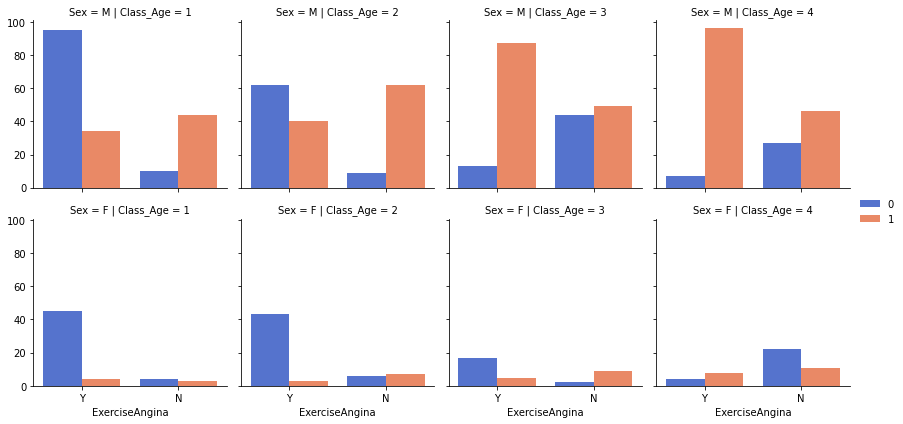

In [19]:
#Histogramme de la présence d'angine induite par classe d'âge et par sexe
g = sns.FacetGrid(df, col="Class_Age", row="Sex");
g.map_dataframe(sns.countplot, "ExerciseAngina", hue="HeartDisease", palette=pa);
g.add_legend();

Pour les hommes, on remarque encore une fois qu'au-delà de 54 ans, il y a une forte probalité que la personne soit malade. Par contre, ce nombre est d'autant plus important s'il y a présence d'une angine induite. Pour les autres classes, la présence d'une angine induite implique moins la présence une maladie cardiaque. Par contre, beaucoup de jeunes hommes adultes n'ont pas besoin de développer une angine induite pour être malade.  
Pour les femmes, la remarque est différente car jusqu'à 60 ans la présence d'une angine induite n'engendre pas forcément une maladie cardiaque. Cependant, il existe des sujets malades sans forcément avoir ce critère.

On en conclut que selon les tranches d'âge et le sexe du patient, les observations sont différentes. Au-delà de 54 ans, beaucoup d'hommes développent des problèmes cardiques même si le critère en question est normal. Cela veut signifier que c'est un autre critère à partir de cet  âge qui rentre en jeu et qu'un sujet masculin est plus sensible à développer une maladie à partir de cet âge.  
Les femmes développent moins de maladies cardiaques peu importe leur classe d'âge mais restent néanmoins sensibles à certains facteurs quand ils sont anormaux. 

Pour les données numériques concernant la tensions artérielles au repos (RestingBP), le niveau de cholesterol (cholesterol) et le nombre de battements de coeur atteint (MaxHR), on va choisir un représentation en nuage de points afin de mieux comrendre visuellement la répartie de ce critères et s'il existe un lien avec la présence d'une maladie cardiaque. On fera encore une distinction par classe d'âge et par sexe.

In [20]:
#Création d'un index 
df['index2'] = range(0,len(df.Sex))

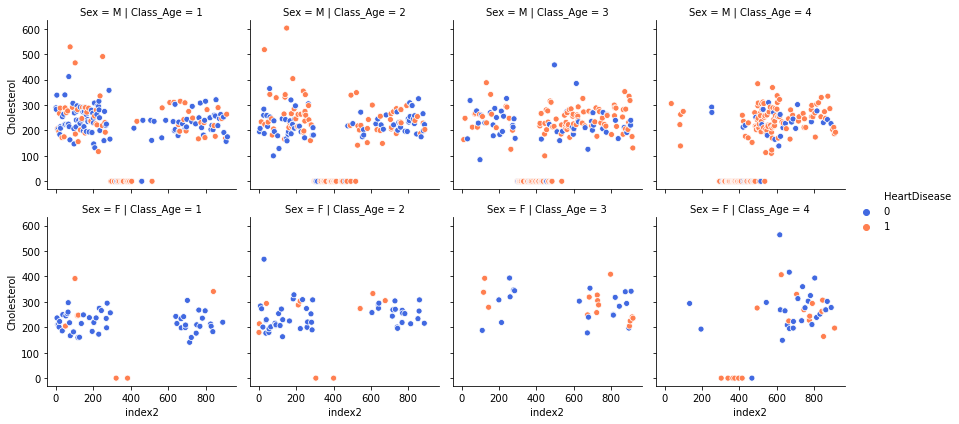

In [21]:
#Nuages de points du niveau de cholesterol par patients par classe d'âge et par sexe 
g = sns.FacetGrid(df, col="Class_Age", row="Sex")
g.map_dataframe(sns.scatterplot, "index2", "Cholesterol", hue="HeartDisease", palette=pa)
g.add_legend();

Le cholesterol est un corps gras indispensable pour le bon fonctionnement du corps humain. Le LDL est connu pour être le mauvais cholesterol car un taux important de celui-ci peut être un facteur important de risque cardiovasculaire. Le taux de cholesterol ne devrait pas excéder 200 mg/dl, voire 238 mg/dl. Par contre s'il dépasse 240 mg/dl, celà rique d'être dangeureux.  
Pour les hommes, on constate que le niveau de cholesterol se situe entre 180 et 300 mm/dl majoritairement. On constate alors que plus la classe d'âge est importante, plus le sujet est malade.  
Pour les femmes, ce taux ne montre rien de particulié car elles restent majoritairement saine peu importe la classe d'âge.

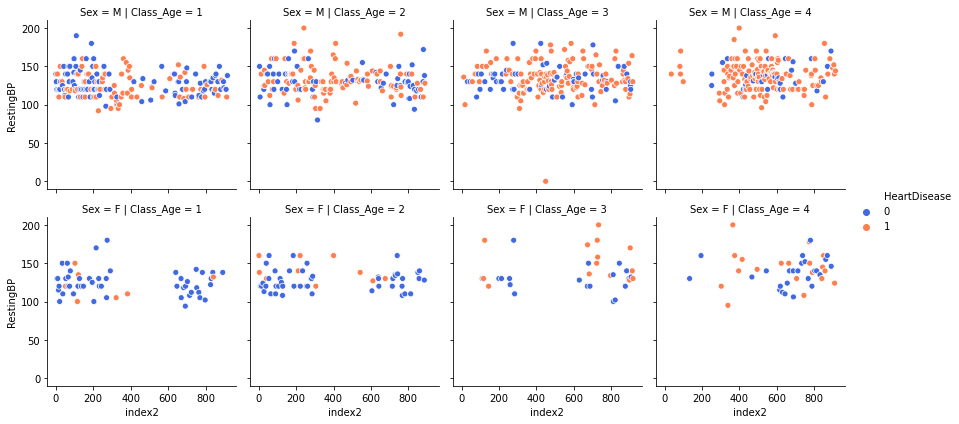

In [22]:
#Nuages de points du niveau de la tension arterielle au repos par patients par classe d'âge et par sexe 
g = sns.FacetGrid(df, col="Class_Age", row="Sex")
g.map_dataframe(sns.scatterplot, "index2", "RestingBP", hue="HeartDisease", palette=pa)
g.add_legend();

La tension artérielle est exprimée en millimètre de mercure (mmHg). Ici, nous disposons de la tension artérielle systolique qui est la mesure maximale excercée dans la phase de contraction du ventricule gauche. En-dessous de 100 mmHg, la valeur est faible. Entre 100 mmHg et 140 mmHg, on est dans la norme. Au-delà, on est en hypertersion.  
Pour les hommes, on constate que la tension est artérielle est supérieure à 100 mmHg comme attendu et avec certains cas extrêmes en hypertension de degré 3 (>=180 mmHg). On remarque que plus la classe d'âge augmente plus les sujets ont une maladie cardiaque.  
Pour les femmes, on constate également que plus l'âge augmente, plus une tension artérielle élevée induit une maladie cardiaque.


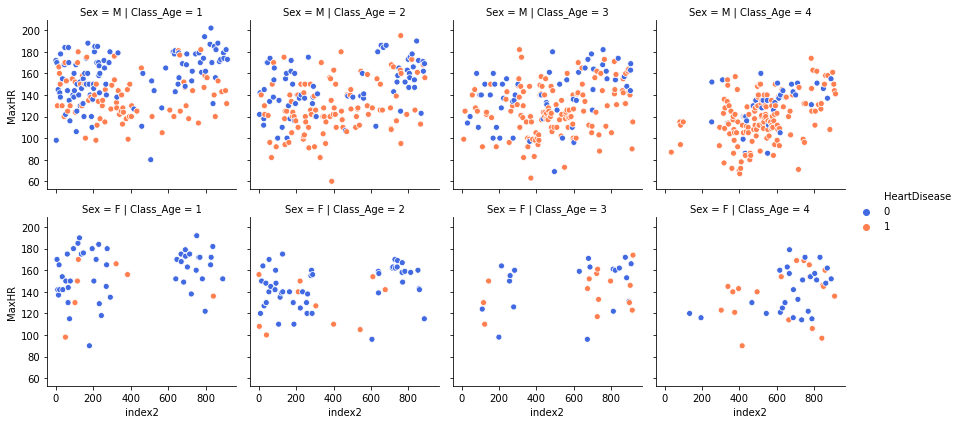

In [23]:
#Nuages de points du nombre de battemments de coeur atteint par patients par classe d'âge et par sexe 
g = sns.FacetGrid(df, col="Class_Age", row="Sex")
g.map_dataframe(sns.scatterplot, "index2", "MaxHR", hue="HeartDisease", palette=pa)
g.add_legend();

La fréquence cardiaque normale chez un adulte est comprise entre 60 et 100 battements par minute. Il est plus élevé chez les femmes que chez les hommes.La fréquence maximale se calcule pour une femme de 226 - âge et pour un homme de 220 - âge. Par exemple, pour une femme de 30 ans, la fréquence maximale est de 196 battements par minute et pour un homme, elle est de 190 battements par minute.  
Pour les hommes, on constate bien qu'avec l'âge, les tensions s'abaissent en majorité et qu'il existe plus de personnes malades en fonction de l'âge.  
Pour les femmes, on constate également la même chose même si elles développent moins de maladie cardiaque.

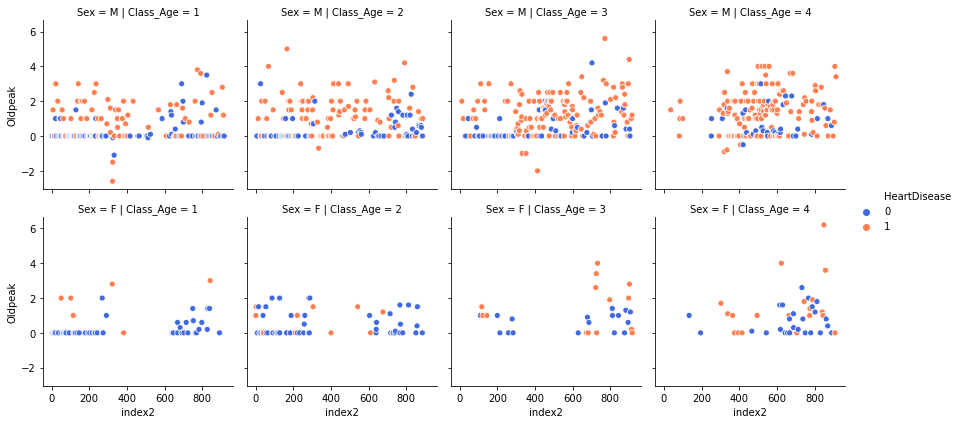

In [24]:
#Nuages de points sur les valeurs du oldpeak par patients par classe d'âge et par sexe 
g = sns.FacetGrid(df, col="Class_Age", row="Sex")
g.map_dataframe(sns.scatterplot, "index2", "Oldpeak", hue="HeartDisease", palette=pa)
g.add_legend();

#Suppression de la colonne index2
df = df.drop('index2', 1)

Le oldpeak est la pente du segment ST.  
Pour les hommes, on constate que pour un âge inférieur à 60 ans, quand l'inclinaison est nulle, les sujets ont moins de probabilité d'avoir de maladie cardiaque. Par contre si ce facteur est supérieur à 0, peu importe l'âge, il y a de forte présence de maladie cardique chez ses patients.  
Pour les femmes, on constate qu'inférieure à 54 ans, cette valeur est majoritairement nulle et implique un coeur sain. Par contre avec l'âge, ceux qui ont une valeur non-nulle possède une maladie cardiaque.

Pour cette partie, on en conlut que l'âge joue un rôle majeure sur l'importance de la prise en compte de certains critères et donc sur le fait que les sujets soient malades ou non.  
Les hommes ont plus de faciliter à développer une maladie cardiaque comme nous l'avons constaté au début de l'étude. L'âge est par contre un facteur déterminant pour les deux genres car plus celui-ci augmente plus la probabilité de développer une maladie cardique augmente aussi.

### Etude de corrélation

Nous allons maintenant étudier la corrélation de chacun de ces critères en fonction du fait qu'elles possèdent une maladie cardiaque ou non. Nous disposons de variables catégorielles et de variables continues. Pour étudier la corrélation entre les variables catégorielles, on utilisera le test de Cramer. Pour les variables continues et la variable "Heartdisease", on utilisera l'analyse de la variannce ANOVA.

#### Etude de corrélation des variables catégorielles avec la variable HeartDisease
On va construire un nouveau dataset avec les variables catégorielles uniquement.

In [25]:
#Construction du dataset les variables catégorielles du dataset
df_cat = df[['Class_Age','Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope','HeartDisease']]

In [26]:
#On change le type de la variable Heartdisease
df_cat=df_cat.astype({"HeartDisease":object,"FastingBS":object})

In [27]:
#Vérification des types des variables du nouveau dataset
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Class_Age       918 non-null    object
 1   Sex             918 non-null    object
 2   ChestPainType   918 non-null    object
 3   FastingBS       918 non-null    object
 4   RestingECG      918 non-null    object
 5   ExerciseAngina  918 non-null    object
 6   ST_Slope        918 non-null    object
 7   HeartDisease    918 non-null    object
dtypes: object(8)
memory usage: 57.5+ KB


In [29]:
#Création des tableaux de confusion nécessaire pour effectuer les tests de khi-2
dt1 = pd.crosstab(df_cat.Class_Age, df_cat.HeartDisease)
dt2 = pd.crosstab(df_cat.Sex, df_cat.HeartDisease)
dt3 = pd.crosstab(df_cat.ChestPainType, df_cat.HeartDisease)
dt4 = pd.crosstab(df_cat.FastingBS, df_cat.HeartDisease)
dt5 = pd.crosstab(df_cat.RestingECG, df_cat.HeartDisease)
dt6 = pd.crosstab(df_cat.ExerciseAngina, df_cat.HeartDisease)
dt7 = pd.crosstab(df_cat.ST_Slope, df_cat.HeartDisease)

#Test de corrélation entre la variable Class_Age et la variable HeartDisease
resultats_test = chi2_contingency(dt1)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

def V_Cramer (table,N):
    stat_chi2 = chi2_contingency(dt1)[0]
    k = dt1.shape[0]
    r = dt1.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

df1 = pd.DataFrame((statistique, p_valeur, degre_liberte, V_Cramer(dt1,df_cat.shape[0])), 
             index =['statistique', 'p_valeur','degre_liberte', 'V_Cramer'], columns = ['Test Class_Age Correlation'])


#Test de corrélation entre la variable Sex et la variable HeartDisease
resultats_test = chi2_contingency(dt2)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

def V_Cramer (table,N):
    stat_chi2 = chi2_contingency(dt2)[0]
    k = dt2.shape[0]
    r = dt2.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

df2 = pd.DataFrame((statistique, p_valeur, degre_liberte, V_Cramer(dt2,df_cat.shape[0])), 
             index =['statistique', 'p_valeur','degre_liberte', 'V_Cramer'], columns = ['Test Sex Correlation'])


#Test de corrélation entre la variable ChestPainType et la variable HeartDisease
resultats_test = chi2_contingency(dt3)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

def V_Cramer (table,N):
    stat_chi2 = chi2_contingency(dt3)[0]
    k = dt3.shape[0]
    r = dt3.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

df3 = pd.DataFrame((statistique, p_valeur, degre_liberte, V_Cramer(dt3,df_cat.shape[0])), 
             index =['statistique', 'p_valeur','degre_liberte', 'V_Cramer'], columns = ['Test ChestPainType Correlation'])

#Test de corrélation entre la variable FastingBS et la variable HeartDisease
resultats_test = chi2_contingency(dt4)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

def V_Cramer (table,N):
    stat_chi2 = chi2_contingency(dt4)[0]
    k = dt4.shape[0]
    r = dt4.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

df4 = pd.DataFrame((statistique, p_valeur, degre_liberte, V_Cramer(dt4,df_cat.shape[0])), 
             index =['statistique', 'p_valeur','degre_liberte', 'V_Cramer'], columns = ['Test FastingBS Correlation'])

#Test de corrélation entre la variable RestingECG et la variable HeartDisease
resultats_test = chi2_contingency(dt5)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

def V_Cramer (table,N):
    stat_chi2 = chi2_contingency(dt5)[0]
    k = dt5.shape[0]
    r = dt5.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

df5 = pd.DataFrame((statistique, p_valeur, degre_liberte, V_Cramer(dt4,df_cat.shape[0])), 
             index =['statistique', 'p_valeur','degre_liberte', 'V_Cramer'], columns = ['Test RestingECG Correlation'])

#Test de corrélation entre la variable ExerciseAngina et la variable HeartDisease
resultats_test = chi2_contingency(dt6)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

def V_Cramer (table,N):
    stat_chi2 = chi2_contingency(dt6)[0]
    k = dt6.shape[0]
    r = dt6.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

df6 = pd.DataFrame((statistique, p_valeur, degre_liberte, V_Cramer(dt6,df_cat.shape[0])), 
             index =['statistique', 'p_valeur','degre_liberte', 'V_Cramer'], columns = ['Test ExerciseAngina Correlation'])

#Test de corrélation entre la variable ST_Slope et la variable HeartDisease
resultats_test = chi2_contingency(dt7)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

def V_Cramer (table,N):
    stat_chi2 = chi2_contingency(dt7)[0]
    k = dt7.shape[0]
    r = dt7.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

df7 = pd.DataFrame((statistique, p_valeur, degre_liberte, V_Cramer(dt7,df_cat.shape[0])), 
             index =['statistique', 'p_valeur','degre_liberte', 'V_Cramer'], columns = ['Test ST_Slope Correlation'])



In [30]:
#Tableau final des correlations
pd.concat([df1, df2, df3, df4, df5, df6, df7], axis = 1)

,Test Class_Age Correlation,Test Sex Correlation,Test ChestPainType Correlation,Test FastingBS Correlation,Test RestingECG Correlation,Test ExerciseAngina Correlation,Test ST_Slope Correlation
statistique,8.104659e+01,8.414510e+01,2.680672e+02,6.432068e+01,10.931469,2.222594e+02,3.559184e+02
p_valeur,1.830321e-17,4.597617e-20,8.083728e-58,1.057302e-15,0.004229,2.907808e-50,5.167638e-78
degre_liberte,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,2.000000,1.000000e+00,2.000000e+00
V_Cramer,2.917316e-01,3.011141e-01,5.376392e-01,2.627754e-01,0.098679,4.912079e-01,6.212492e-01


En posant l'Hypothèse nulle H0: "La variable catégorielle concernée et la variable HeartDisease sont indépendantes", on choisit également de prendre pour seuil de signification la valeur 5% pour décider du rejet ou non de cette hypothèse. Si les p-valeurs, calculées grâce à un test du khi-2, sont inférieurs à 5%, on rejette H0. On constate que toutes les p-valeurs sont netemment inférieures à 5%. De plus, on mesure également le V-Cramer qui se mesure à l'aide de la statistique du test, du degré de liberté et des dimensions de la table contingence. Il renvoie une valeur entre 0 et 1. Si la valeur est renvoyée est supérieure à 0.9 on peut qualifier la relation de très forte. Si la valeur est inférieure à 0.10 on peut qualifier la relation de faible. On peut constater que toutes les valeurs sont supérieures à 0.10 sauf pour la variable TestRestingECG. Le test V-Cramer permet alors de savoir quelles valeurs sont plus plus ou moins liées à la variable HeartDisease. Le test ST_Slope avec une valeur de 0.62 montre que c'est la valeur la plus liée par rapport aux autres. On en conclue qu'avec les p-valeurs obtenues, nous pouvons rejetter l'hypothèse nulle pour l'ensemble des tests. Les variables sont donc plus ou moins dépendantes de la variable HeartDisease. Ces critères montrent qu'en effet, ils ont une influence propre sur la présence d'une maladie cardiaque chez les patients. 

#### Etude de corrélation des variables continues avec la variable HeartDisease
On va construire un nouveau dataset avec les variables numériques uniquement.

In [31]:
#Création du dataframe contenant les critères numériques
df_num = df[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak","HeartDisease"]]

In [32]:
#Vérification des types des variables du nouveau dataset
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           918 non-null    int64  
 1   RestingBP     918 non-null    int64  
 2   Cholesterol   918 non-null    int64  
 3   MaxHR         918 non-null    int64  
 4   Oldpeak       918 non-null    float64
 5   HeartDisease  918 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 43.2 KB


In [33]:
#Test ANOVA entre la variable Age et HeartDisease
result = statsmodels.formula.api.ols('Age ~ HeartDisease', data = df_num).fit()
t1 = statsmodels.api.stats.anova_lm(result)
t1

,df,sum_sq,mean_sq,F,PR(>F)
HeartDisease,1.0,6490.086756,6490.086756,79.160779,3.007953e-18
Residual,916.0,75099.304312,81.986140,NaN,NaN


In [34]:
#Test ANOVA entre la variable RestingBP et HeartDisease
result = statsmodels.formula.api.ols('RestingBP ~ HeartDisease', data = df_num).fit()
t1 = statsmodels.api.stats.anova_lm(result)
t1

,df,sum_sq,mean_sq,F,PR(>F)
HeartDisease,1.0,3638.418644,3638.418644,10.727228,0.001095
Residual,916.0,310685.250202,339.176037,NaN,NaN


In [35]:
#Test ANOVA entre la variable Cholesterol et HeartDisease
result = statsmodels.formula.api.ols('Cholesterol ~ HeartDisease', data = df_num).fit()
t1 = statsmodels.api.stats.anova_lm(result)
t1

,df,sum_sq,mean_sq,F,PR(>F)
HeartDisease,1.0,5.943230e+05,594322.989040,52.459725,9.308309e-13
Residual,916.0,1.037748e+07,11329.128964,NaN,NaN


In [36]:
#Test ANOVA entre la variable MaxHR et HeartDisease
result = statsmodels.formula.api.ols('MaxHR ~ HeartDisease', data = df_num).fit()
t1 = statsmodels.api.stats.anova_lm(result)
t1

,df,sum_sq,mean_sq,F,PR(>F)
HeartDisease,1.0,95308.300476,95308.300476,174.913585,1.137786e-36
Residual,916.0,499117.338957,544.887925,NaN,NaN


In [37]:
#Test ANOVA entre la variable Oldpeak et HeartDisease
result = statsmodels.formula.api.ols('Oldpeak ~ HeartDisease', data = df_num).fit()
t1 = statsmodels.api.stats.anova_lm(result)
t1

,df,sum_sq,mean_sq,F,PR(>F)
HeartDisease,1.0,170.217796,170.217796,178.61512,2.390772e-37
Residual,916.0,872.935624,0.952986,NaN,NaN


Pour étudier, la corrélation entre ces variables, on a recourt cette fois à un test ANOVA pour chacune des variables continues. Il permet de comparer les moyenennes d'échantillon. L'objectif est de savoir l'influence d'une variable continue sur une variable catégorielle. De la même façon que précedemment, on pose l'Hypothèse H0:"La variable catégorielle concernée et la variable HeartDisease sont indépendantes". On prendra également comme seuil de signification 5%. Les résultats obtenus montrent que les valeurs PR(>F) de chaque variable, qui renseigne sur les p-valeurs du test, sont toutes largement inférieures à 5%. Nous pouvons donc rejeter l'hypothèse H0 et affirmer qu'il existe un lien entre ces variables continues et la variables HeartDisease.

Dans la suite de l'étude, nous allons démontrer s'il est possible de savoir si une personne a une maladie au coeur à partir de l'ensemble des données mis à disposition. On utilisera des algorithmes de Machine Learning pour prédire ces résultats. Les variables étant toutes plus ou moins corrélées à la variable HeartDisease, on conservera l'ensemble des données pour affiner au maximum les résultats.

## Machine Learning

### Méthodes de classification

Le machine learning est une technique de programmation informatique qui utilise des probabilités statistiques pour donner aux ordinateurs la capacité d’apprendre par eux-mêmes sans programmation explicite. Pour son objectif de base, le machine learning « apprend à apprendre » aux ordinateurs – et par la suite, à agir et réagir – comme le font les humains, en améliorant leur mode d’apprentissage et leurs connaissances de façon autonome sur la durée. L’objectif ultime serait que les ordinateurs agissent et réagissent sans être explicitement programmés pour ces actions et réactions. Le machine learning utilise des programmes de développement qui s’ajustent chaque fois qu’ils sont exposés à différents types de données en entrée.  
Il existe 3 types de machine learning:
- Machine learning avec supervision, la variable de sortie est une catégorie (méthode de classification) ou une valeur spécifique (méthode de régression)  
- Machine learning sans supervision, on recherche soit à rassembler des données pour obtenir un résultat (méthode de clustering) ou à identifier certaines règles qui définissent des grands groupes de données (méthode d'association)
- Machine learning par renforcement, un programme informatique interagit avec un environnement dynamique pour atteindre un but comme dans les jeux vidéos.  Le programme reçoit des récompenses à la fin de l'état "terminal" (méthode de Monte Carlo) ou à chaque étape (Machine learning par différence temporelle)  

Dans notre cas, l'étude permet de savoir si un patient à une maladie cardiaque ou non. On fera donc une étude de machine learning avec supervision en étudiant différents algorithmes comme la méthode des k-plus proches voisins par exemple.

### Préparation du dataset aux méthodes de classification par supervision

Le dataset contient des variables catégorielles qu'il va falloir convertir en données numériques pour que les algorithmes puissent utiliser les données. On utilise la methode des "dummies" qui consiste à créer une colonne séparée pour chacune des valeurs uniques des colonnes de catégories. Il y a donc création d'une nouvelle colonne par attribut de variable. On procède à ce que l'on appelle une dichotomisation des variables.  
On fait ensuite une mise à l'échelle des données numériques. En effet, cela va permttre d'obtenir des données numériques à une échelle commune. On consatate qu'il faut mettre à l'échelle la colonne "Oldpeak" par rapport aux autres sinon la colonne "Cholesterol" aura plus de poids et d'influence par rapport à cette dernière sur les résultats de Machine Learning.

In [38]:
#Encodage des valeurs catégorielles du dataset
label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in df.columns :
    if i in ('Class_Age','Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope') :
      df[i]=label.fit_transform(df[i])

#Dichotomisation des variables catégorielles
df = pd.get_dummies(df, columns=["Class_Age","Sex","ChestPainType","FastingBS","RestingECG","ExerciseAngina","ST_Slope"])

#Mise à l'échelle des données continue
scaler = MinMaxScaler()
col = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak"]
df[col] = scaler.fit_transform(df[col])

df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Class_Age_0,Class_Age_1,Class_Age_2,Class_Age_3,...,FastingBS_0,FastingBS_1,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,0.244898,0.70,0.479270,0.788732,0.295455,0,1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0.676056,0.409091,1,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0.267606,0.295455,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0.338028,0.465909,1,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0.436620,0.295455,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [39]:
#Réorganisation du dataset avec les variables catégorielles, continues d'un côté et la variable HeartDisease de l'autre
df = df[["Age","RestingBP","Cholesterol","MaxHR","Oldpeak","Class_Age_0","Class_Age_1","Class_Age_2","Class_Age_3",
        "Sex_0","Sex_1","ChestPainType_0","ChestPainType_1","ChestPainType_2","ChestPainType_3","FastingBS_0","FastingBS_1",
        "RestingECG_0","RestingECG_1","RestingECG_2","ExerciseAngina_0","ExerciseAngina_1","ST_Slope_0","ST_Slope_1","ST_Slope_2",
        "HeartDisease"]]

In [40]:
df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Class_Age_0,Class_Age_1,Class_Age_2,Class_Age_3,Sex_0,...,FastingBS_1,RestingECG_0,RestingECG_1,RestingECG_2,ExerciseAngina_0,ExerciseAngina_1,ST_Slope_0,ST_Slope_1,ST_Slope_2,HeartDisease
0,0.244898,0.70,0.479270,0.788732,0.295455,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,0.428571,0.80,0.298507,0.676056,0.409091,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,1
2,0.183673,0.65,0.469320,0.267606,0.295455,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,0.408163,0.69,0.354892,0.338028,0.465909,0,1,0,0,1,...,0,0,1,0,0,1,0,1,0,1
4,0.530612,0.75,0.323383,0.436620,0.295455,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.507042,0.431818,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
914,0.816327,0.72,0.320066,0.570423,0.681818,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,1
915,0.591837,0.65,0.217247,0.387324,0.431818,0,0,1,0,0,...,0,0,1,0,0,1,0,1,0,1
916,0.591837,0.65,0.391376,0.802817,0.295455,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1


### Méthode de classification supervisée

Avant d'établir nos différentes méthodes de classification, nous allons séparer notre jeu de données.Dans une premier temps, on regroupe l'ensemble des données médicales de chaque patient: *data* et la colonne "Heartdisease" sur la présence d'une maladie cardiaque qui notre variable cible: *target*. Puis on sépare en une partie d'entrainement et une partie test notre jeu de donnée avec les proportions suivantes: 80% pour la partie entrainement et 20% pour la partie test. On s'assurera que le découpage se fait dans l'ordre du dataset par rapport à l'index. On spécifiera donc le paramètre 'test_size = 0.2' et 'shuffle = False' dans la fonction *train_test_split*.

In [41]:
#Séparation entre données d'entrainement et données test
data = df.drop("HeartDisease",axis=1)
target = df.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(data, target, shuffle=False, test_size = 0.2)

On s'interesse maintenant aux classifieurs qui vont nous permettre de résoudre notre étude de classification supervisée. On choisit de façon arbitraire de comparer les classifieurs suivant: 
- la méthode des K-plus proches voisins (KNeigborsClassifier)
- une régression linéaire (LinearRegression)
- la régression logistique (LogisticRegression) 
- une regression logistique regularisée (ElasticNet)
- une méthode d'apprentissage par arbre de décision (DecisionClassifierTree)
- un algorithme de forêt aléatoire (RandomForest)
- une méthode de boosting (AdaBoost)  

#### Méthodes des K-plus proches voisins

La méthode des "k-plus proches voisins" fait partie des méthodes les plus simples d'apprentissage supervisé et peut être utilisé dans notre cas de cassification. Il s'agit d'une méthode non-paramétrique dans laquelle le modèle mémorise les observations de l'ensemble d'apprentissage pour la classification des données de l'ensemble test. En effet, cet alogorithme est qualifié de paresseux car il n'apprend rien durant la phase d'entrainement. Pour prédire la classe d'une nouvelle donnée, il va chercher les K-plus proches(en utilisant la distance euclidienne par exemple)et choisisra la classe des voisins majoritaires. On prendra un nombre de n-voisins égale à 5 et la métrique par défaut de Minkowski.

In [42]:
#Classification avec la méthode des k-plus proches voisins
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#Affichage des scores
print('Le score du modèle sur l ensemble d apprentissage est',knn.score(X_train,y_train))
print('Le score du modèle sur l ensemble test est',knn.score(X_test,y_test))

#Affichage des erreurs
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)
print('La MSE de la partie train est:',mean_squared_error(knn_pred_train,y_train))
print('La MSE de la partie test est:',mean_squared_error(knn_pred_test,y_test))

Le score du modèle sur l ensemble d apprentissage est 0.8991825613079019
Le score du modèle sur l ensemble test est 0.7663043478260869
La MSE de la partie train est: 0.1008174386920981
La MSE de la partie test est: 0.23369565217391305


In [43]:
#Calcul de la matrice de prediction
cm = pd.crosstab(y_test,knn_pred_test , rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0,1
Classe réelle,,
0,76,22
1,21,65


On constate que le score est très élevé de 0.76 pour la partie test et qu'il s'adapte très bien à notre étude. On constate également que le score test est inférieur à notre score d'entrainement comme l'écart entre les erreurs. On parle alors d'overfitting de notre système prédictif qui s'adapte trop bien aux données d'entrainement. Par la suite, on essaiera de réduire cet écart en modifiant les hyperparamètres de la fonction *KNeighborsClassifier*. La matrice de confusion nous montre que 141 sujets ont été bien catégorisés contre 43 patients où il y eu une erreur de diagnostique.

#### Régression linéaire

En statistiques, en économétrie et en apprentissage automatique, un modèle de régression linéaire est un modèle de régression qui cherche à établir une relation linéaire entre une variable, dite expliquée, et une ou plusieurs variables, dites explicatives. On parle aussi de modèle linéaire ou de modèle de régression linéaire. 

In [44]:
#Classification LinearSVC
lr = LinearRegression()
lr.fit(X_train,y_train)

#Affichage des scores
print('Le score du modèle sur l ensemble d apprentissage est',lr.score(X_train,y_train))
print('Le score du modèle sur l ensemble test est',lr.score(X_test,y_test))

#Affichage des erreurs
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)
print('La MSE de la partie train est:',mean_squared_error(lr_pred_train,y_train))
print('La MSE de la partie test est:',mean_squared_error(lr_pred_test,y_test))

Le score du modèle sur l ensemble d apprentissage est 0.6094679004519631
Le score du modèle sur l ensemble test est 0.3984332901072488
La MSE de la partie train est: 0.09544027046546624
La MSE de la partie test est: 0.1497520153289256


Les scores sont moins bons avec cette méthode avec un score test de 0.39. Il y a toujours de l'overfitting avec une légère diminution. 

#### Régression Logistique

La regression logistique est un modèle de régression binomiale. Comme tous les modèles de régression binomiale, il s'agit de modéliser au mieux un modèle mathématique simple à partir des observations réelles nombreuses. En d'autres termes d'associer à un vecteur de variables aléatoires ( x 1 , … , x K ) à une variable aléatoire binomiale génériquement notée y. La régression logistique constitue un cas particulier de modèle linéaire généralisé. Elle est largement utilisée en apprentissage automatique. On fixera le maximum d'itérations à 2000 pour réaliser la convergence.

In [45]:
#Classification à l'aide d'une régression logistique
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

#Affichage des scores
print('Le score du modèle sur l ensemble d apprentissage est',clf.score(X_train,y_train))
print('Le score du modèle sur l ensemble test est',clf.score(X_test,y_test))

#Affichage des erreurs
clf_pred_train = clf.predict(X_train)
clf_pred_test = clf.predict(X_test)
print('La MSE de la partie train est:',mean_squared_error(clf_pred_train,y_train))
print('La MSE de la partie test est:',mean_squared_error(clf_pred_test,y_test))

Le score du modèle sur l ensemble d apprentissage est 0.8869209809264306
Le score du modèle sur l ensemble test est 0.7717391304347826
La MSE de la partie train est: 0.11307901907356949
La MSE de la partie test est: 0.22826086956521738


In [46]:
#Calcul de la matrice de prediction
cm = pd.crosstab(y_test,clf_pred_test , rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0,1
Classe réelle,,
0,77,21
1,21,65


De nouveau, le score est très bon avec cette méthode avec un score test de 0.77. Il y a toujours de l'overfitting avec une légère diminution une nouvelle fois. 142 patients ont été bien catégorisés contre 42 selon la matrice de confusion.

#### Régression Logistique régularisée

La méthode Elastic Net est un type de régression régularisée pour laquelle le coefficient de pénalisation est une combinaison linéaire des pénalité L1 et L2. Il est donc un dérivé des régressions de Ridge et Lasso avec pour avantages: la conservation de la capacité de sélection de variables de LASSO avec exclusion des variables non pertinentes et le partage des poids entre variables corrélées et pas de sélection arbitraire.  

In [47]:
#Classification à l'aide d'une régression régularisée appelée Elastic Net
model_en = ElasticNetCV()
model_en.fit(X_train,y_train)

#Affichage des scores
print('Le score du modèle sur l ensemble d apprentissage est',model_en.score(X_train,y_train))
print('Le score du modèle sur l ensemble test est',model_en.score(X_test,y_test))

#Affichage des erreurs
mpred_train = model_en.predict(X_train)
mpred_test = model_en.predict(X_test)
print('La valeur RMSE du modèle d entrainement est:',mean_squared_error(mpred_train,y_train))
print('La valeur RMSE du modèle test est:',mean_squared_error(mpred_test,y_test))

Le score du modèle sur l ensemble d apprentissage est 0.6039960876746706
Le score du modèle sur l ensemble test est 0.38775151227100824
La valeur RMSE du modèle d entrainement est: 0.09677750059841964
La valeur RMSE du modèle test est: 0.15241110156486118


Cette fois-ci, les score sont plus bas avec un score test de 0.38 avec une erreur de 0.15 plus basse. On constate un overfitting plus important que pour les modèles précédents.

#### Méthode d'apprentissage par arbre de décisision

L'apprentissage par arbre de décission est une méthode basée sur l'utilisation d'un arbre de décision comme modèle prédictif. On l'utilise en fouille de donnée et en apprentissage automatique. Dans ces structures d'arbre, les feuilles représentent les valeurs de la variable-cible et les embranchements correspondent à des combinaisons de variables d'entrée qui mènent à ces valeurs. En analyse de décision, un arbre de décision peut être utilisé pour représenter de manière explicite les décisions réalisées et les processus qui les amènent. En apprentissage et en fouille de données, un arbre de décision décrit les données mais pas les décisions elles-mêmes, l'arbre serait utilisé comme point de départ au processus de décision. C'est une technique d'apprentissage supervisé : on utilise un ensemble de données pour lesquelles on connaît la valeur de la variable-cible afin de construire l'arbre (données dites étiquetées), puis on extrapole les résultats à l'ensemble des données de test. Les arbres de décision font partie des algorithmes les plus populaires en apprentissage automatique.

In [48]:
#Classification par arbre de décision
clf2 = DecisionTreeClassifier(max_depth=5)
clf2.fit(X_train,y_train)

#Affichage des scores
print('Le score du modèle sur l ensemble d apprentissage est',clf2.score(X_train,y_train))
print('Le score du modèle sur l ensemble test est',clf2.score(X_test,y_test))

#Affichage des erreurs
clf2_pred_train = clf2.predict(X_train)
clf2_pred_test = clf2.predict(X_test)
print('La valeur RMSE du modèle d entrainement est:',mean_squared_error(clf2_pred_train,y_train))
print('La valeur RMSE du modèle test est:',mean_squared_error(clf2_pred_test,y_test))

Le score du modèle sur l ensemble d apprentissage est 0.9182561307901907
Le score du modèle sur l ensemble test est 0.7554347826086957
La valeur RMSE du modèle d entrainement est: 0.08174386920980926
La valeur RMSE du modèle test est: 0.24456521739130435


In [49]:
#Calcul de la matrice de prediction
cm = pd.crosstab(y_test,clf2_pred_test, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0,1
Classe réelle,,
0,71,27
1,18,68


Les scores sont ici très élevés avec un score test de 0.75. Il ya toujours présence d'overfitting entre la partie entrainement et la partie test. 139 patients ont été bien catégorisés contre 45 avec cet algorithme. 

#### Un algorithme de fôret aléatoire

L'algorithme des "fôrets aléatoires" (ou Random Forest) est un algorithme de classification qui réduit la variance des prévisions d'un arbre seul, améliorant ainsi leurs performances. Pour cela, il combine de nombreux arbres de décisions dans une approche de type bagging.

In [50]:
#Classification avec algorithme de forêt aléatoire
clf3 = RandomForestClassifier()
clf3.fit(X_train,y_train)

#Affichage des scores
print('Le score du modèle sur l ensemble d apprentissage est',clf3.score(X_train,y_train))
print('Le score du modèle sur l ensemble test est',clf3.score(X_test,y_test))

#Affichage des erreurs
clf3_pred_train = clf3.predict(X_train)
clf3_pred_test = clf3.predict(X_test)
print('La valeur RMSE du modèle d entrainement est:',mean_squared_error(clf3_pred_train,y_train))
print('La valeur RMSE du modèle test est:',mean_squared_error(clf3_pred_test,y_test))

Le score du modèle sur l ensemble d apprentissage est 1.0
Le score du modèle sur l ensemble test est 0.7880434782608695
La valeur RMSE du modèle d entrainement est: 0.0
La valeur RMSE du modèle test est: 0.21195652173913043


In [51]:
#Calcul de la matrice de prediction
cm = pd.crosstab(y_test,clf3_pred_test, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0,1
Classe réelle,,
0,76,22
1,17,69


Le score test est élevé avec un score de 0.78. Il y a toujours de l'overfitting entre la partie entrainement et la partie test. Selon la matrice de confusion, 144 patients ont été diagnostiqués positivement contre 40 patients. 

#### Une méthode de boosting

Le Boosting est un ensemble de méthodes visant essentiellement à réduire le biais de modèles de Machine Learning simples et faibles et les convertir en un modèle stable et puissant. AdaBoost est un algorithme parmi tant d'autres dont l'idée consiste à appliquer cette règle plusieurs fois en affectant judicieusement un poids différent aux observations à chaque itération.
Les poids de chaque observation sont initialisés à 1/n pour l’estimation du premier modèle.Ils sont ensuite mis à jour pour chaque itération. L’importance d’une observation est inchangée si l’observation est bien classée; dans le cas contraire elle augmente avec la qualité d’ajustement du modèle mesurée.
L’agrégation finale est une combinaison des estimateurs obtenus pondérée par les qualités d’ajustement de chaque modèle.

In [52]:
#Classification à l'aide de séquences d'arbre d'arbres de décisions ADABOOST 
ac = AdaBoostClassifier()
ac.fit(X_train,y_train)

#Affichage des scores
print('Le score du modèle sur l ensemble d apprentissage est',ac.score(X_train,y_train))
print('Le score du modèle sur l ensemble test est',ac.score(X_test,y_test))

#Affichage des erreurs
ac_pred_train = ac.predict(X_train)
ac_pred_test = ac.predict(X_test)
print('La valeur RMSE du modèle d entrainement est:',mean_squared_error(ac_pred_train,y_train))
print('La valeur RMSE du modèle test est:',mean_squared_error(ac_pred_test,y_test))

Le score du modèle sur l ensemble d apprentissage est 0.896457765667575
Le score du modèle sur l ensemble test est 0.782608695652174
La valeur RMSE du modèle d entrainement est: 0.10354223433242507
La valeur RMSE du modèle test est: 0.21739130434782608


In [53]:
#Calcul de la matrice de prediction
cm = pd.crosstab(y_test,ac_pred_test, rownames=['Classe réelle'], colnames=['Classe prédite'])
cm

Classe prédite,0,1
Classe réelle,,
0,80,18
1,22,64


Pour finir, l'algorithme a un score test de 0.78. Tout comme l'algorithme précédent, la matrice de confusion 144 patients ont été diagnostiqués positivement contre 40 patients.

#### Récapitulatif des résultats

In [54]:
#On récapitule les scores et erreurs dans différents tableaux qui seront fusionnés en un seul.
res1 = pd.DataFrame((knn.score(X_train,y_train),knn.score(X_test,y_test),mean_squared_error(knn_pred_train,y_train),mean_squared_error(knn_pred_test,y_test)) , 
             index =['Score entrainement', 'Score test','MSE entrainement', 'MSE test'], columns = ['KNN'])

res2 = pd.DataFrame((lr.score(X_train,y_train),lr.score(X_test,y_test),mean_squared_error(lr_pred_train,y_train),mean_squared_error(lr_pred_test,y_test)) , 
             index =['Score entrainement', 'Score test','MSE entrainement', 'MSE test'], columns = ['Linear Regression'])

res3 = pd.DataFrame((clf.score(X_train,y_train),clf.score(X_test,y_test),mean_squared_error(clf_pred_train,y_train),mean_squared_error(clf_pred_test,y_test)) , 
             index =['Score entrainement', 'Score test','MSE entrainement', 'MSE test'], columns = ['Logistic Regression'])

res4 = pd.DataFrame((model_en.score(X_train,y_train),model_en.score(X_test,y_test),mean_squared_error(mpred_train,y_train),mean_squared_error(mpred_test,y_test)) , 
             index =['Score entrainement', 'Score test','MSE entrainement', 'MSE test'], columns = ['Elastic Net'])

res5 = pd.DataFrame((clf2.score(X_train,y_train),clf2.score(X_test,y_test),mean_squared_error(clf2_pred_train,y_train),mean_squared_error(clf2_pred_test,y_test)) , 
             index =['Score entrainement', 'Score test','MSE entrainement', 'MSE test'], columns = ['Decision Classifier Tree'])

res6 = pd.DataFrame((clf3.score(X_train,y_train),clf3.score(X_test,y_test),mean_squared_error(clf3_pred_train,y_train),mean_squared_error(clf3_pred_test,y_test)) , 
             index =['Score entrainement', 'Score test','MSE entrainement', 'MSE test'], columns = ['Random Forest'])

res7 = pd.DataFrame((ac.score(X_train,y_train),ac.score(X_test,y_test),mean_squared_error(ac_pred_train,y_train),mean_squared_error(ac_pred_test,y_test)) , 
             index =['Score entrainement', 'Score test','MSE entrainement', 'MSE test'], columns = ['AdaBoost'])

tab = pd.concat([res1,res2,res3,res4,res5,res6,res7],axis=1)
tab

,KNN,Linear Regression,Logistic Regression,Elastic Net,Decision Classifier Tree,Random Forest,AdaBoost
Score entrainement,0.899183,0.609468,0.886921,0.603996,0.918256,1.000000,0.896458
Score test,0.766304,0.398433,0.771739,0.387752,0.755435,0.788043,0.782609
MSE entrainement,0.100817,0.095440,0.113079,0.096778,0.081744,0.000000,0.103542
MSE test,0.233696,0.149752,0.228261,0.152411,0.244565,0.211957,0.217391


On constate parmi les algorithmes testés, les résultats tests sont entre 76% et 78%. Il n'y a que les algorithmes de régression linéaire et de régression logistique régularisée qui ont un score test nettement en-dessous. On conserve donc les autres algorithmes afin de faire varier leurs paramètres et choisir celui qui a les meilleur scores et qui minimise l'overfitting.

#### Sélection du modèle

Dans cette partie, nous allons sélectionner un modèle grâce la validation croisée imbriquée (nested cross validation). En effet, celà va nous permettre de choisir nos hyperparamètres et d'estimer de manière la plus fiable possible l'erreur de généralisation de chaque modèle. 

In [56]:
#Instanciation de 2 grilles contenant les paramètres à tester de nos modèles
param_grid_knn = {'n_neighbors':[5,10,20,40],
                  'metric':['minkowski','manhattan']}

param_grid_clf = { 'solver': ['liblinear', 'lbfgs'],
                   'C':[0.1, 1, 10]}

param_grid_clf2 = {'criterion':['gini','entropy'],
                   'max_depth': [1,4,8],
                   'max_features': ['sqrt', 'log2']}

param_grid_clf3 = {'n_estimators': [10, 50, 100, 250],
                   'min_samples_leaf': [1, 3, 5],
                   'max_depth': [1,4,8],
                   'max_features': ['sqrt', 'log2']}

param_grid_ac = {'n_estimators':[50,500,1000]}

In [57]:
#Instanciation d'une grille qui contient les modèles et les paramètres correspondants
gridcvs ={}

for pgrid, cl, name in zip((param_grid_knn, param_grid_clf, param_grid_clf2, param_grid_clf3, param_grid_ac),(knn,clf,clf2,clf3,ac),('KNN','Logistic Regression','Decision Classifier Tree','Random Forest','AdaBoost')):
    gcv = GridSearchCV(cl,pgrid,cv=3,refit=True)
    gridcvs[name] = gcv

In [58]:
#Calcul des scores par validation croisée
outer_cv = StratifiedKFold(n_splits=3, shuffle=True)
outer_scores = {}

for name, gs in gridcvs.items():
    nested_score = cross_val_score(gs, 
                                   X_train, 
                                   y_train, 
                                   cv=outer_cv)
    outer_scores[name] = nested_score
    print(f'{name}: outer accuracy {100*nested_score.mean():.2f} +/- {100*nested_score.std():.2f}')

KNN: outer accuracy 88.15 +/- 0.35
Logistic Regression: outer accuracy 87.88 +/- 2.15
Decision Classifier Tree: outer accuracy 81.47 +/- 1.23
Random Forest: outer accuracy 88.70 +/- 1.63
AdaBoost: outer accuracy 85.15 +/- 1.51


In [59]:
#Affichage des paramètres sélectionnés et affichage taux de bonnes prédictions 
#du modèle sur l'ensemble d'entraînement et l'ensemble de test pour l'algorythme des K-plus proches voisins
final_clf = gridcvs['KNN']
final_clf.fit(X_train, y_train)

print(f'Best Parameters: {final_clf.best_params_}')

train_acc = accuracy_score(y_true=y_train, y_pred=final_clf.predict(X_train))
test_acc = accuracy_score(y_true=y_test, y_pred=final_clf.predict(X_test))

print(f'Training Accuracy: {100*train_acc:.2f}')
print(f'Test Accuracy: {100*test_acc:.2f}')

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 20}
Training Accuracy: 89.51
Test Accuracy: 78.26


Les résultats précédents nous montre que l'algorithme qui possède le meilleur score de sortie avec une variance la plus faible est associée à l'algorithme des k-plus proches voisins. On choisit donc par la suite d'afficher les hyperparamètres les plus optimisés. Il faut alors choisir manhattan pour la métric et 20 pour le nombre de voisins regroupés. On remarquera que l'on a légèrement réduit l'overfitting également grâce à une augmentation du score test. Le machine learning permet alors de savoir dans notre cas avec une précision de 78% si un patient à une maladie cardiaque à partir des données médicales présentes grâce à l'algorithme des K-plus proches voisins.

## Conclusion

La data-analyse permet de nos jours de prédire certains comportements ou catégoriser des indivius. Dans notre cas, en faisant une analyse graphique des données des patients ainsi qu'une étude de machine learning nous avons pu prédire si un patient était malade ou non. Les algorythmes utilisés ont été testés et c'est l'algorythme des k-plus proches voisins qui permet d'obtenir les meilleurs résultats. On pourra donc savoir si un individu est malade ou non à partir de cette méthode de classification avec supervision. Ce genre d'étude permet alors de voir d'un autre point de vue le monde médical où l'on va essayer de prédire si un patient est malade ou non en fonction de critères. A l'avenir, ce type d'étude n'a pas pour but de remplacer les diagnostics médicaux traditionnels mais de découvrir l'importance et l'influence d'un critère physique sur une maladie d'un point de vue statistique. En l'occurence, cela pourrait aider lors de l'apparition d'une nouvelle maladie ou nouveau virus. La data-analyse est donc un complément d'analyse qui va s'installer non-seulement en médecine mais aussi dans tous les autres secteurs afin d'effectuer ses propres prédictions.